In [1]:
import numpy as np
import tensorflow as tf
import os
import copy
from math import pi

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [13]:

Can = list()
Paper = list()
Glass = list()
Plastic = list()
Can = np.array(Can)
Paper = np.array(Paper)
Glass = np.array(Glass)
Plastic = np.array(Plastic)

Can_test = copy.deepcopy(Can)
Paper_test = copy.deepcopy(Paper)
Plastic_test = copy.deepcopy(Plastic)
Glass_test = copy.deepcopy(Glass)


Class = 4

lableDict = {
                'can' : 0,
                'paper' : 1,
                'glass' : 2,
                'plastic' : 3,
            }

test = np.zeros(4)

def Label2Idx(label):
    idx = np.zeros(4)
    idx[label] = 1
    return idx

dir_path = './data/train'
test_dir_path = './data/test'

def readNpy(dir_path, Can, Paper, Glass, Plastic):
    for dir in os.listdir(dir_path):
        d_path = os.path.join(dir_path, dir)
        file_list = os.listdir(d_path)
        for file in file_list:
            file_path = os.path.join(d_path, file)
            if dir == 'test_c':
                if len(Can) == 0:
                    Can = np.load(file_path)
                else :
                    Can = np.append(Can, np.load(file_path), axis = 0)
            elif dir == 'test_a':
                if len(Paper) == 0:
                    Paper = np.load(file_path)
                else :
                    Paper = np.append(Paper, np.load(file_path), axis = 0)
            # elif dir == 'glass':
            #     if len(Glass) == 0:
            #         Glass = np.load(file_path)
            #     else:
            #         Glass = np.append(Glass, np.load(file_path), axis = 0)
            # elif dir == 'plastic':
            #     if len(Plastic) == 0:
            #         Plastic = np.load(file_path)
            #     else:
            #         Plastic = np.append(Plastic, np.load(file_path), axis = 0)
    
    # Can = np.append(Can, Can_label, axis=1)
    # Paper = np.append(Paper, Paper_label, axis=1)
    # Glass = np.append(Glass, Glass_label, axis=1)
    # Plastic = np.append(Plastic, Plastic_label, axis=1
    # print(Can)
    # Can = np.expand_dims(Can, axis=0)
    # Paper = np.expand_dims(Paper, axis=0)
    # Glass = np.expand_dims(Glass, axis=0)
    # Plastic = np.expand_dims(Plastic, axis=0)
    # print(Can.shape)

    Can_label = np.tile(np.array([1, 0, 0, 0]), reps=[Can.shape[0], 1])
    Paper_label = np.tile(np.array([0, 1, 0, 0]), reps=[Paper.shape[0], 1])
    # Glass_label = np.tile(np.array([0, 0, 1, 0]), reps=[Glass.shape[0], 1])
    # Plastic_label = np.tile(np.array([0, 0, 0, 1]), reps=[Plastic.shape[0], 1])
    # print(Can_label)
    

    label_arr = np.append(Can_label, Paper_label, axis = 0)
    # label_arr = np.append(label_arr, Glass_label, axis = 0)
    # label_arr = np.append(label_arr, Plastic_label, axis = 0)

    # print(label_arr)

    array = list()
    array = np.array(array)
    array = Can
    # array = np.append(Can,[Plastic, Glass, Plastic], axis = 0)
    # array = np.append(array, Can)
    array = np.append(array, Paper, axis = 0)
    # array = np.append(array, Glass, axis = 0)
    # array = np.append(array, Plastic, axis = 0)
    return array, label_arr

Data, Label= readNpy(dir_path, Can, Paper, Glass, Plastic)
print(Data.shape, Label.shape)
# print(Data)
# Data_len = Data.shape[1]
# Can_label = np.expand_dims(np.full((Data_len, Class), Label2Idx(lableDict['can']), dtype='int'),axis=0)
# Paper_label = np.expand_dims(np.full((Data_len, Class), Label2Idx(lableDict['paper']), dtype='int'), axis=0)
# Glass_label = np.expand_dims(np.full((Data_len, Class), Label2Idx(lableDict['glass']), dtype='int'), axis=0)
# Plastic_label = np.expand_dims(np.full((Data_len, Class), Label2Idx(lableDict['plastic']), dtype='int'), axis=0)

test_Data, test_Label= readNpy(test_dir_path, Can_test, Paper_test, Glass_test, Plastic_test)
print(test_Data.shape, test_Label.shape)
# test_Data_len = test_Data.shape[1]
# test_Can_label = np.expand_dims(np.full((test_Data_len, Class), Label2Idx(lableDict['can']), dtype='int'),axis=0)
# test_Paper_label = np.expand_dims(np.full((test_Data_len, Class), Label2Idx(lableDict['paper']), dtype='int'), axis=0)
# test_Glass_label = np.expand_dims(np.full((test_Data_len, Class), Label2Idx(lableDict['glass']), dtype='int'), axis=0)
# test_Plastic_label = np.expand_dims(np.full((test_Data_len, Class), Label2Idx(lableDict['plastic']), dtype='int'), axis=0)

# Label = np.append(Can_label, Paper_label, axis=0)
# Label = np.append(Label, Glass_label, axis=0)
# Label = np.append(Label, Plastic_label, axis=0)

# test_Label = np.append(test_Can_label, test_Paper_label, axis=0)
# test_Label = np.append(test_Label, test_Glass_label, axis=0)
# test_Label = np.append(test_Label, test_Plastic_label, axis=0)

X = Data
# Y = np.reshape(Label, (-1, Label.shape[2]))
Y = Label

test_X = test_Data
test_Y = test_Label

# print(X.shape)
# print(Y.shape)
s = np.arange(X.shape[0])
np.random.shuffle(s)
X_s = X[s]
Y_s = Y[s]

test_s = np.arange(test_X.shape[0])
np.random.shuffle(test_s)
test_X_s = test_X[test_s]
test_Y_s = test_Y[test_s]
# test_X_s = X_s
# test_Y_s = Y_s

(600, 414) (600, 4)
(200, 414) (200, 4)


In [14]:
def training(X, Y, test_X, test_Y, EPOCHS, cp_filepath):
    model = models.Sequential()
    model.add(layers.Conv1D(6, (3), activation = 'relu', input_shape=(X.shape[1], 1)))
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(16, (3), activation = 'relu'))
    # model.add(layers.Dropout(0.2))
    # model.add(layers.Conv1D(64, (3), activation = 'relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(4, activation='softmax'))
    model.summary()

    model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    checkpoint_filepath = cp_filepath

    callback = tf.keras.callbacks.ModelCheckpoint(
        filepath = checkpoint_filepath,
        monitor='val_accuracy',
        mode='max',
        save_best_only = True,
        save_weigths_only = False,

    )

    return model.fit(X, Y, epochs=EPOCHS, validation_data = (test_X, test_Y), callbacks=[callback])


In [15]:
def seperater(queue):
    data = list()
    data = np.arrya(data)
    while True:
        pre_data = queue.pop
        amp = np.abs(pre_data)
        amp = amp / 3417.2854724181298
        phs = np.angle(pre_data)
        phs = (phs - (- pi)) / (pi - (- pi))
        seperated_data = np.append(amp, phs, axis = 0)
        return np.array(seperated_data)

In [16]:
def plotting(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upperleft')
    plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 412, 6)            24        
                                                                 
 conv1d_3 (Conv1D)           (None, 410, 16)           304       
                                                                 
 flatten_1 (Flatten)         (None, 6560)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 26244     
                                                                 
Total params: 26,572
Trainable params: 26,572
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
 5/19 [======>.......................] - ETA: 0s - loss: 63.4885 - accuracy: 0.5125

2022-02-08 21:02:30.637349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/19 [=========================>....] - ETA: 0s - loss: 22.2168 - accuracy: 0.7923

2022-02-08 21:02:30.987447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ./non_normalization/assets
19/19 [==============================] - 1s 41ms/step - loss: 20.1501 - accuracy: 0.8100 - val_loss: 60.5358 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 0s 26ms/step - loss: 0.0234 - accuracy: 0.9967 - val_loss: 18.4482 - val_accuracy: 0.5450
Epoch 3/30
19/19 [==============================] - 1s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 12.1809 - val_accuracy: 0.6300
Epoch 4/30
19/19 [==============================] - 1s 28ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 11.3376 - val_accuracy: 0.6600
Epoch 5/30
19/19 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 11.2132 - val_accuracy: 0.6650
Epoch 6/30
19/19 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 11.1946 - val_accuracy: 0.6650
Epoch 7/30
19/19 [==============================] - 0s 13ms/step - loss: 0.0000e

ValueError: 'upperleft' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

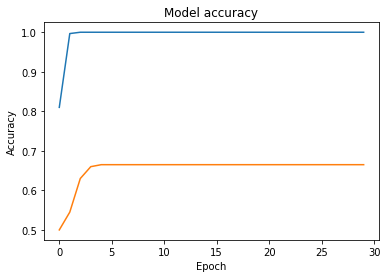

In [17]:
history1 = training(X_s, Y_s, test_X=test_X_s, test_Y=test_Y_s, EPOCHS = 30, cp_filepath='./non_normalization')
plotting(history1)

In [7]:
maximum = np.max(X_s)
X_n = X_s/maximum #normalization
test_X_n = test_X_s/maximum

In [8]:
print(maximum)

(3131+1255j)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 412, 32)           128       
                                                                 
 dropout_2 (Dropout)         (None, 412, 32)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 410, 64)           6208      
                                                                 
 dropout_3 (Dropout)         (None, 410, 64)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 408, 64)           12352     
                                                                 
 flatten_1 (Flatten)         (None, 26112)             0         
                                                                 
 dense_1 (Dense)             (None, 4)                

ipykernel_launcher:7: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


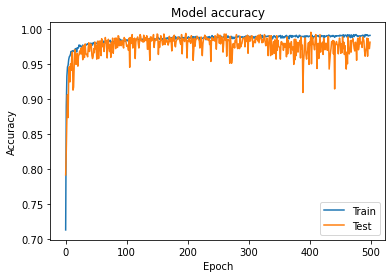

In [9]:
history2 = training(X_n, Y_s, test_X = test_X_n, test_Y = test_Y_s, EPOCHS = 500, cp_filepath='./normalization')
plotting(history2)

In [10]:
print(max(history1.history['val_accuracy']))

0.9908333420753479


In [11]:
print(max(history2.history['val_accuracy']))

0.9950000047683716
